In [621]:
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline
import cv2
import random
import os

In [623]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model

In [625]:
from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  2.18.0


In [627]:
import pathlib
import zipfile
import numpy as np
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from keras.preprocessing import image
from keras.preprocessing.image import *
from fastai.metrics import error_rate, accuracy
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import class_weight

In [629]:
train_path = 'C:/Users/KIIT/NULL CLASS/Visualize Activation Maps of ED/train/'
test_path = 'C:/Users/KIIT/NULL CLASS/Visualize Activation Maps of ED/test/'

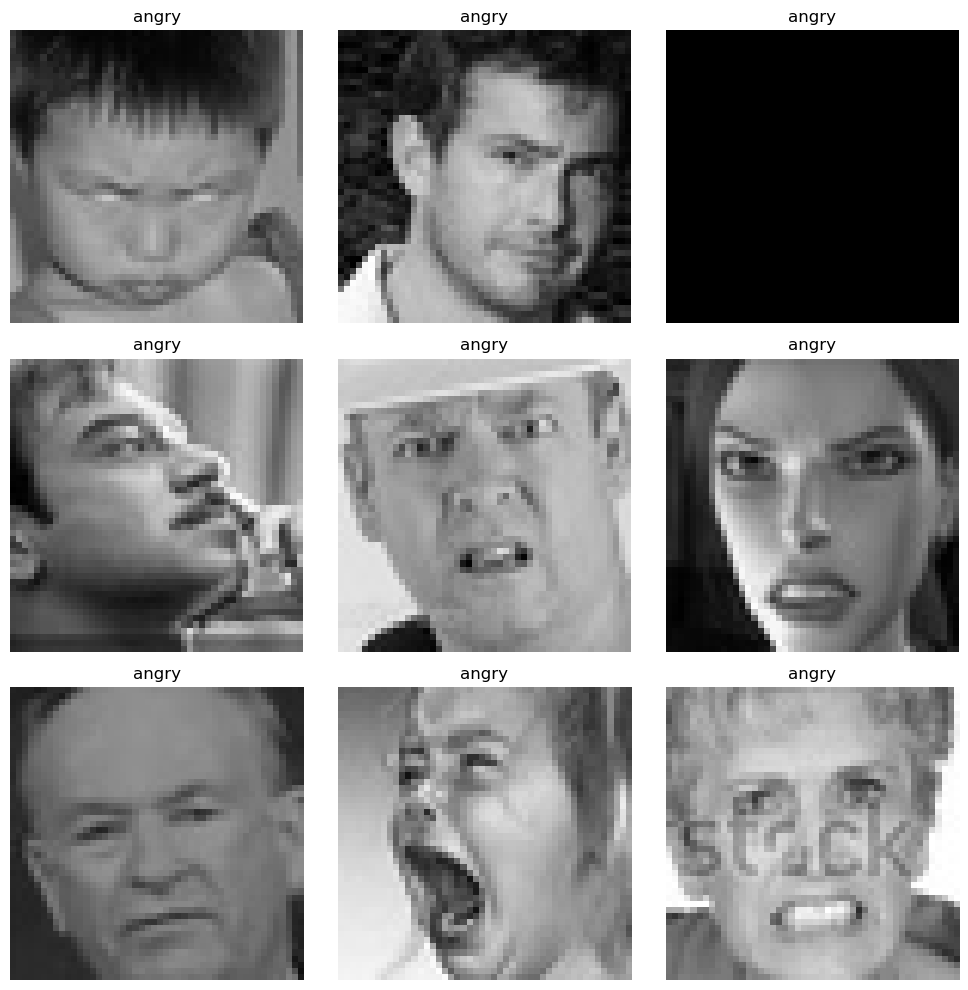

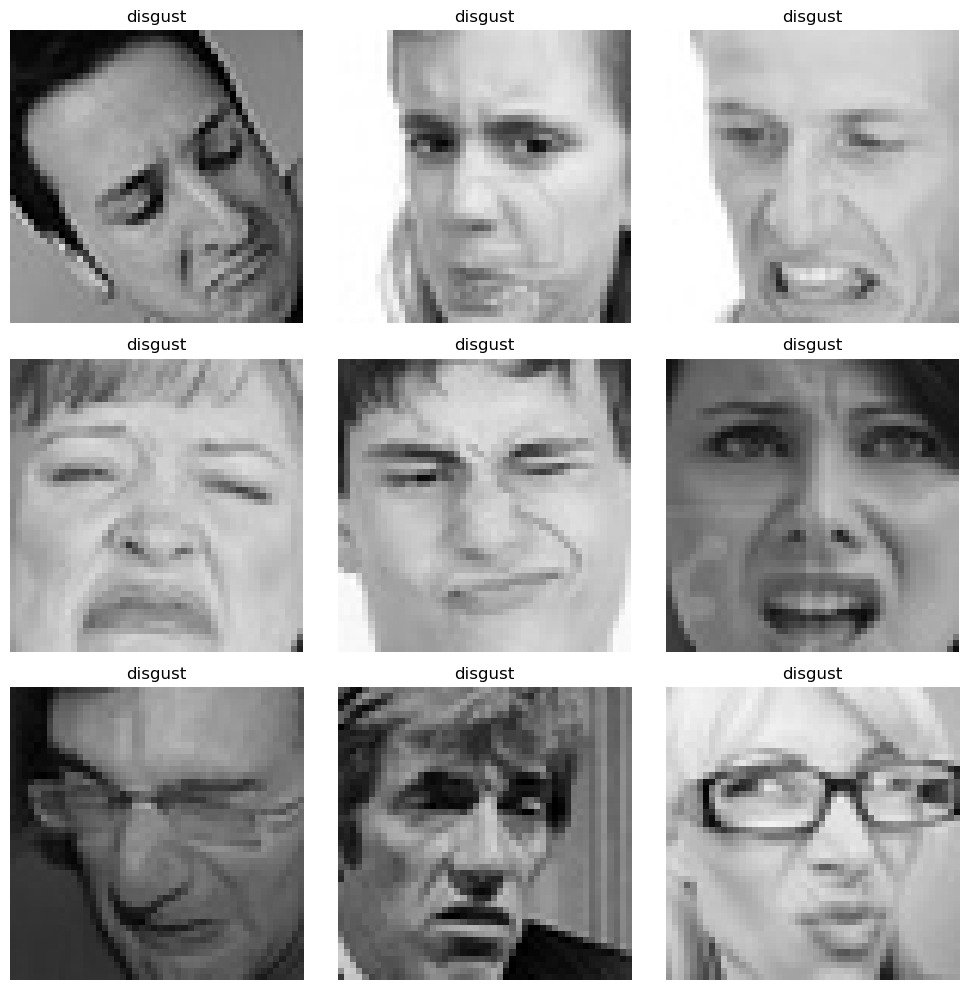

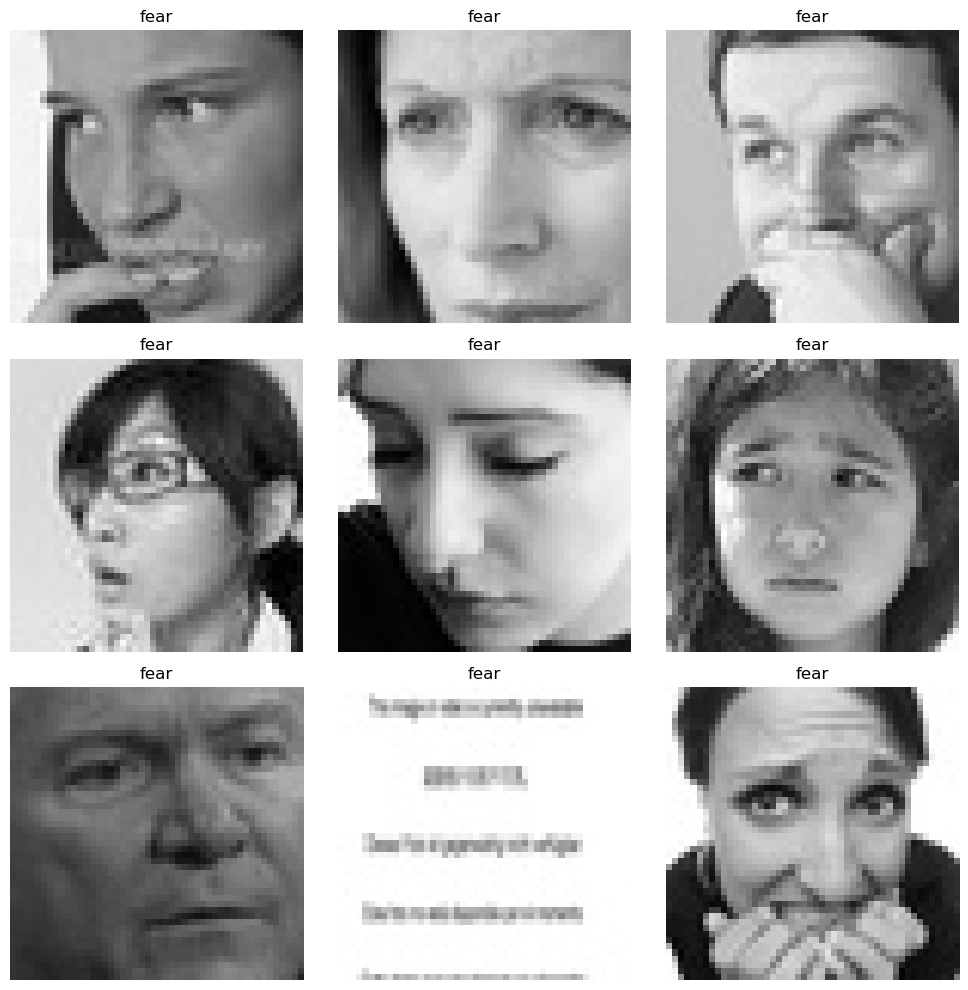

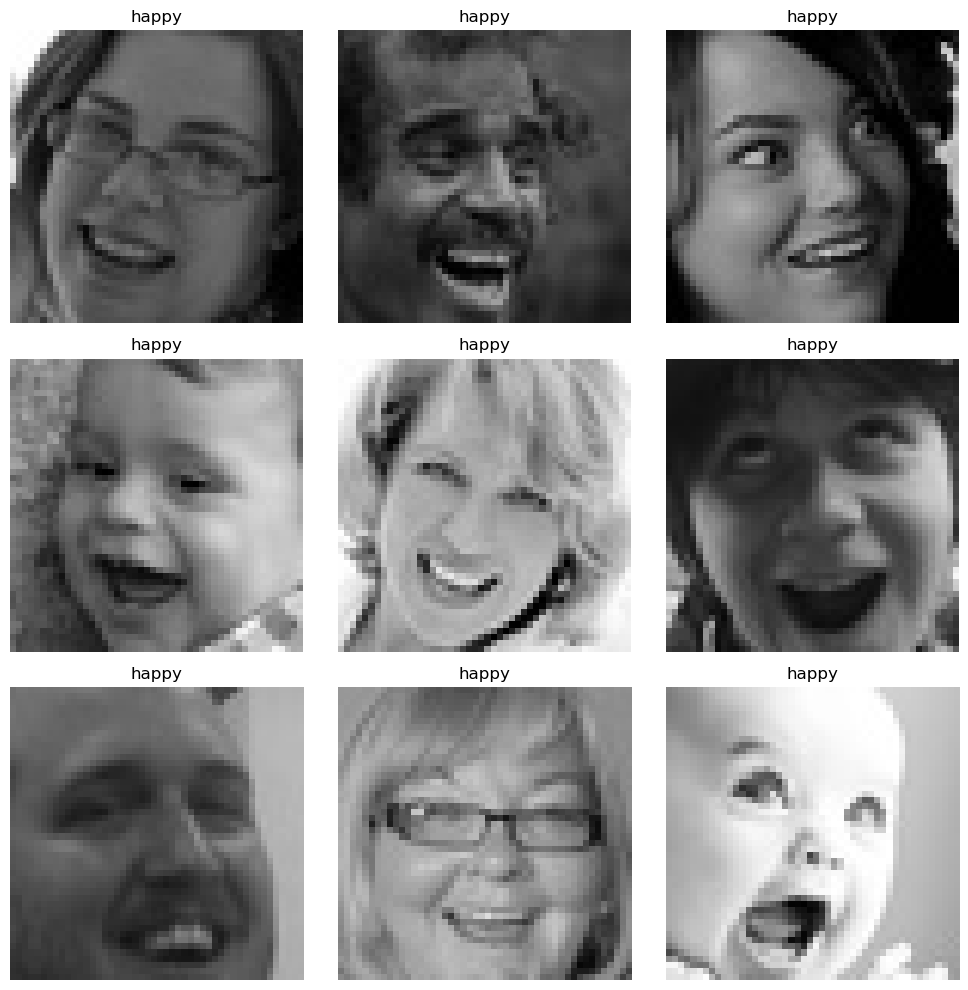

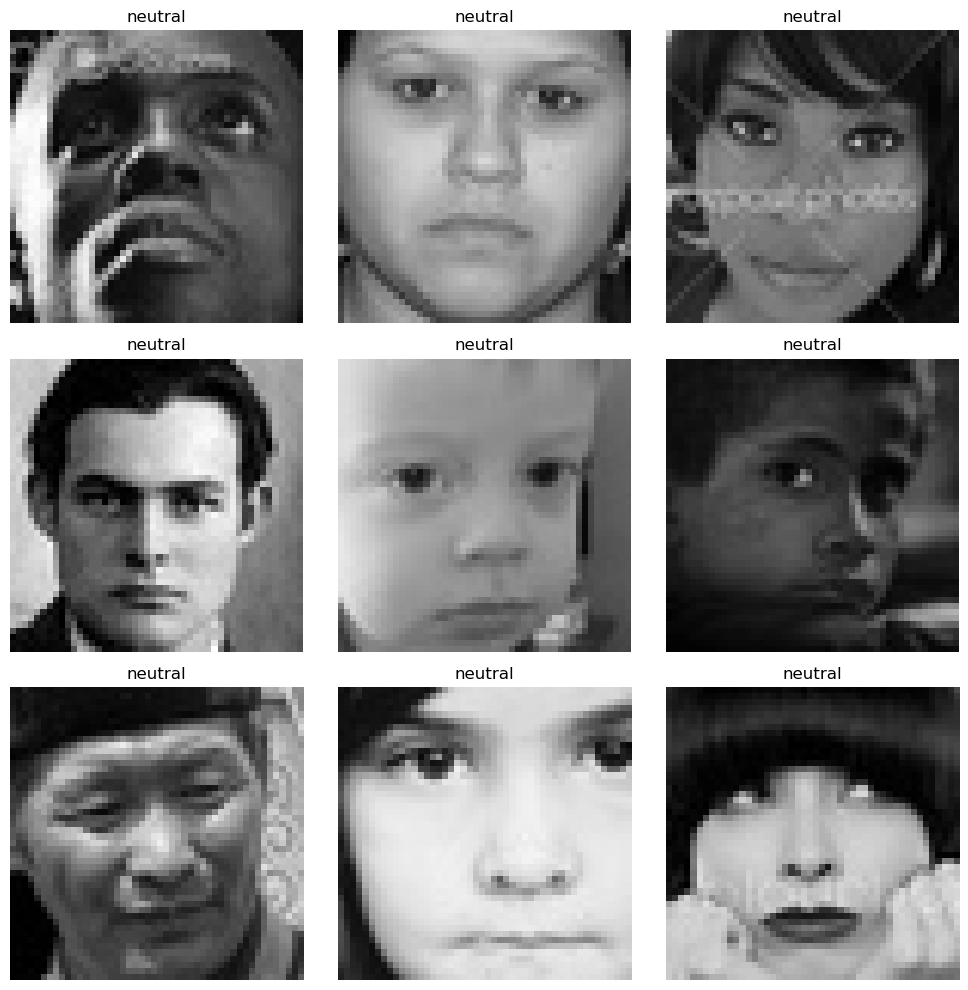

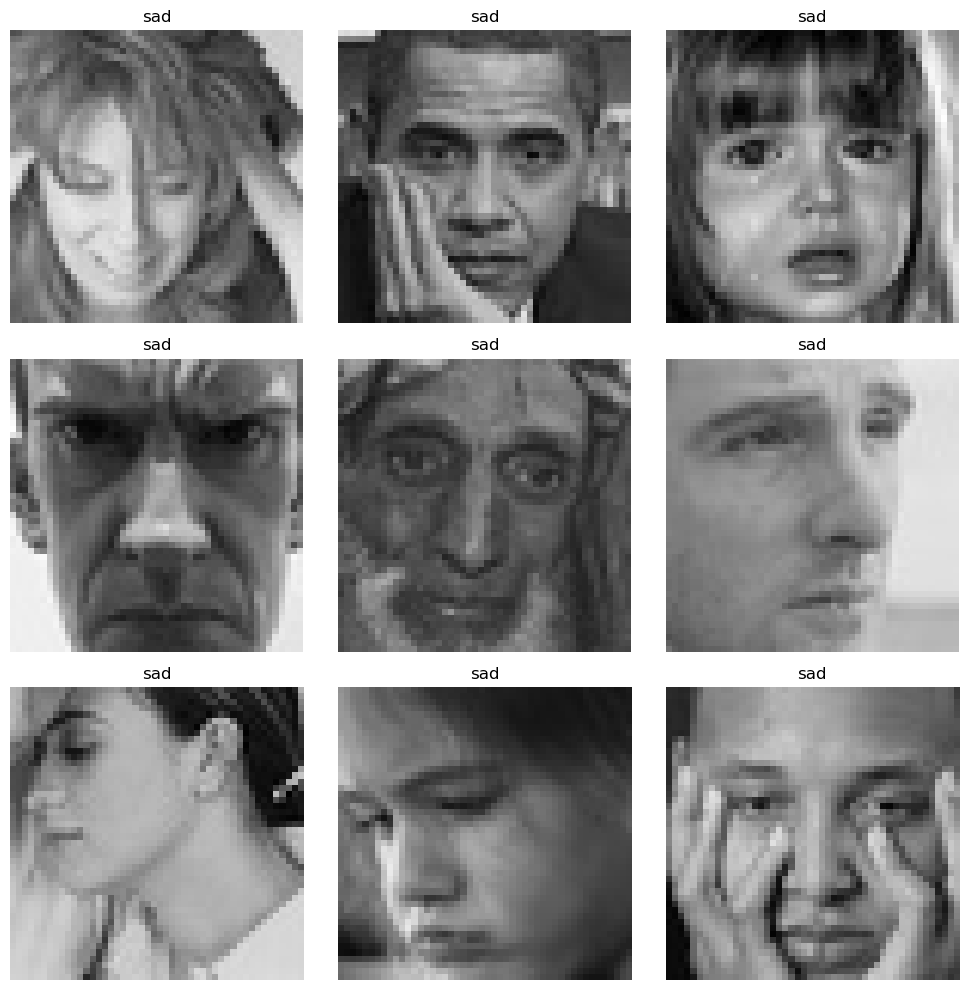

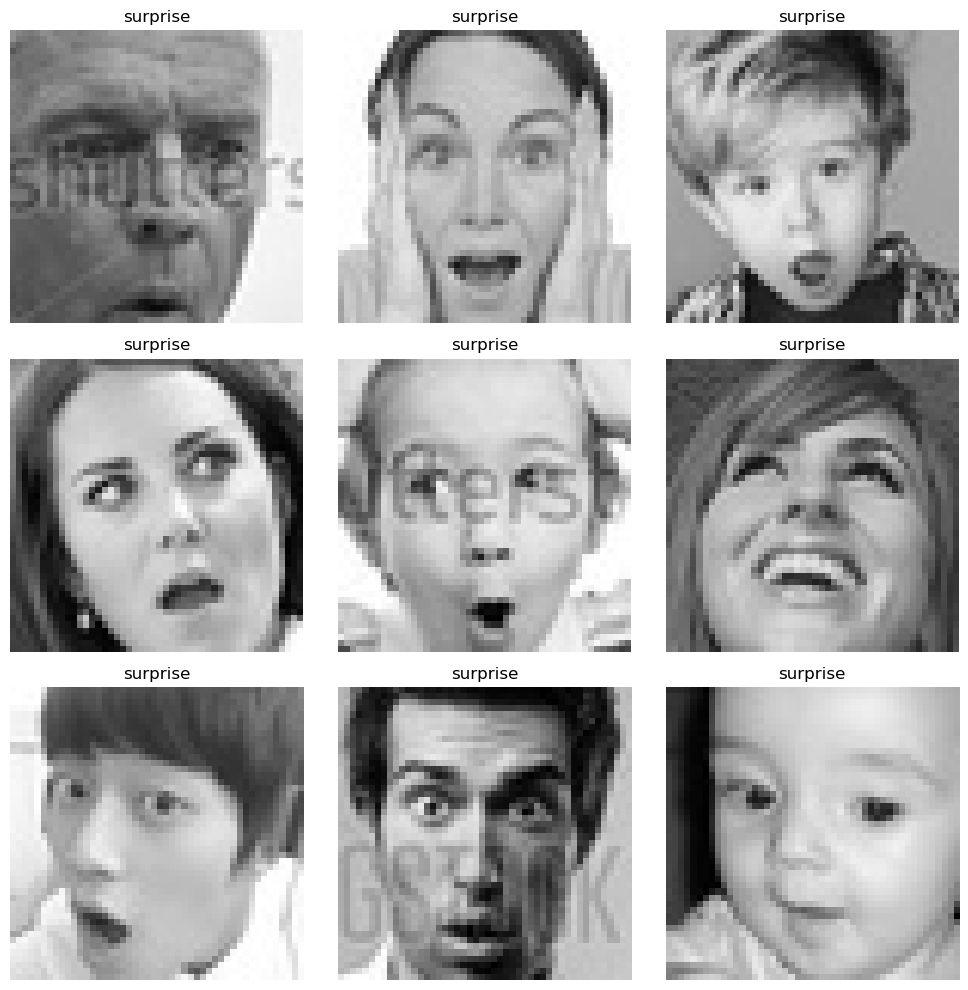

In [631]:
# Function to display images for each emotion
def display_images(emotion):
    plt.figure(figsize=(10, 10))
    folder_path = os.path.join(train_path, emotion)
    
    # Loop to display 9 images
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        
        # Load image
        img_path = os.path.join(folder_path, os.listdir(folder_path)[i])
        img = image.load_img(img_path, target_size=(48, 48)) 
        plt.title(emotion)
        plt.imshow(img) 
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

for emotion in os.listdir(train_path):
    display_images(emotion)


In [634]:
def mylistdir(directory):
    filelist = os.listdir(directory)
    return [x for x in filelist
            if not (x.startswith('.'))]

labels = os.listdir(train_path)
print("Our 7 Emotion Labels:")
labels

Our 7 Emotion Labels:


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

**VISUALIZING OUT DATA**

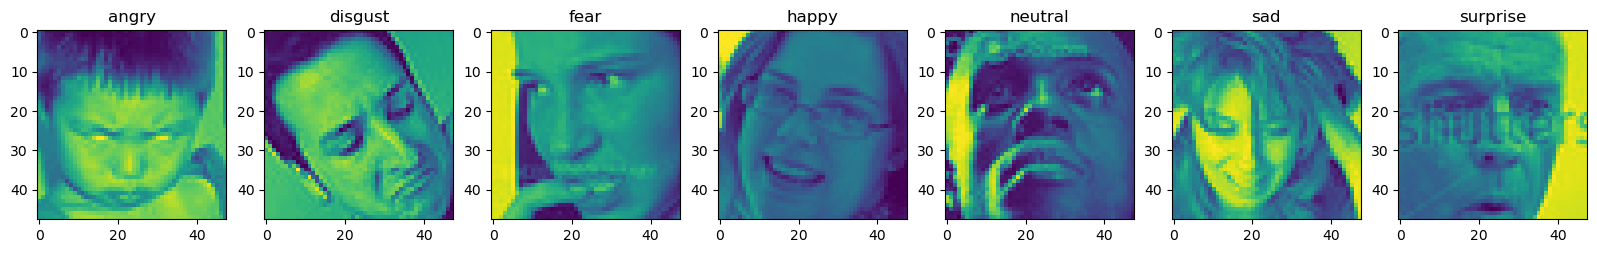

In [637]:
#Display our 7 emotion labels and example image from each class
fig, axes = plt.subplots(1, 7, figsize=(20,20))

for i in range(7):

    ex_image = train_path + labels[i]+ '/' + mylistdir(train_path + labels[i]+'/')[0]
    axes[i].imshow(plt.imread(ex_image))
    axes[i].set_title(labels[i])

plt.show()

In [639]:
#Print Image Label Distributions
for i in labels:
    print(i, '\nTrain: ' + str(len(os.listdir(train_path + i +'/')))+ ' images' +'\nTest: ' + str(len(os.listdir(test_path+i+'/')))+' images\n')

angry 
Train: 3995 images
Test: 958 images

disgust 
Train: 436 images
Test: 111 images

fear 
Train: 4097 images
Test: 1024 images

happy 
Train: 7215 images
Test: 1774 images

neutral 
Train: 4965 images
Test: 1233 images

sad 
Train: 4830 images
Test: 1247 images

surprise 
Train: 3171 images
Test: 831 images



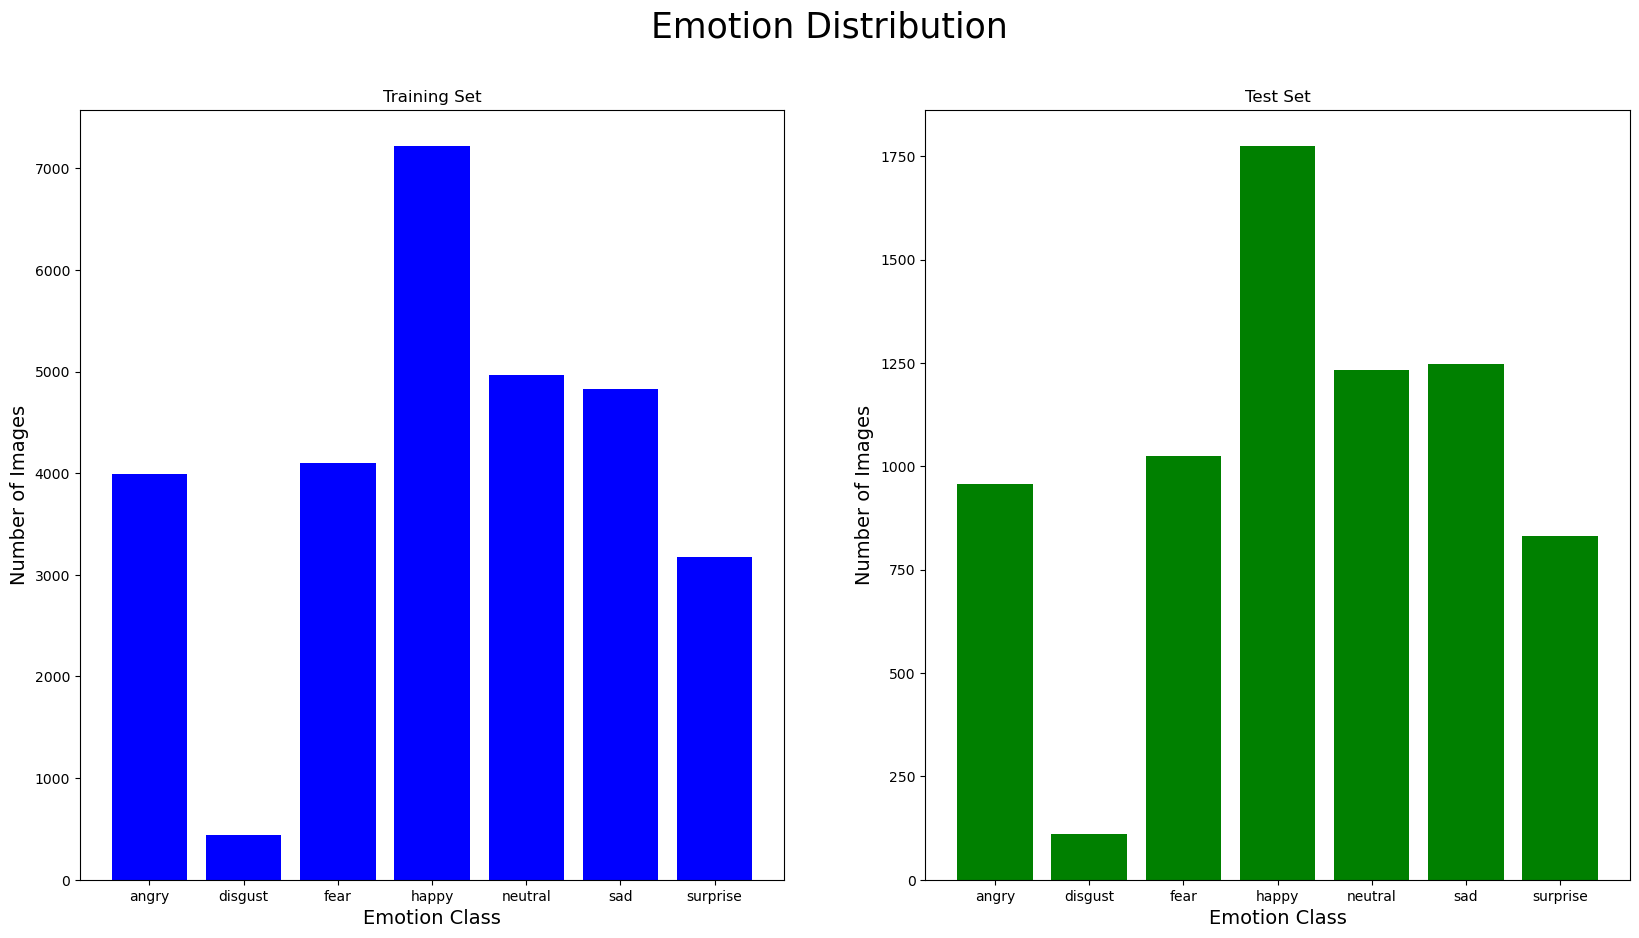

In [641]:
train_dist = np.array([len(os.listdir(train_path+i+'/')) for i in labels])
test_dist = np.array([len(os.listdir(test_path+i+'/')) for i in labels])
x = labels

plt.figure(figsize=(20,10))
plt.suptitle('Emotion Distribution', fontsize=25)

ax1 = plt.subplot(1,2,1)
ax1.set_title('Training Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, train_dist, color='blue')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, test_dist, color='green')
plt.show()

**DATA PREPROCESSING**

In [643]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [644]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x
    

In [647]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [649]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the model
input_layer = Input(shape=(48, 48, 1))  # Correct input shape for grayscale images

x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output_layer = Dense(7, activation='softmax')(x)  # Adjusted to 7 classes

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train/',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'test/',
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)

# Convert generators to tf.data.Dataset and use .repeat() for infinite iteration
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 7), dtype=tf.float32)
    )
).repeat()  # Repeat the dataset infinitely

validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 7), dtype=tf.float32)
    )
).repeat()  # Repeat validation data if necessary

# Calculate steps per epoch and validation steps based on dataset size
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

# Define callbacks
checkpoint = ModelCheckpoint(
    "modelWeight.weights.h5",
    monitor='val_accuracy',
    save_weights_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    min_lr=0.00001
)

callbacks = [checkpoint, reduce_lr]

# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=validation_dataset,
    validation_steps=validation_steps,
    callbacks=callbacks
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/15
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.3373 - loss: 1.6956
Epoch 1: saving model to modelWeight.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 98s 104ms/step - accuracy: 0.3374 - loss: 1.6954 - val_accuracy: 0.4295 - val_loss: 1.4898 - learning_rate: 0.0010
Epoch 2/15
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4653 - loss: 1.3970
Epoch 2: saving model to modelWeight.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.4653 - loss: 1.3970 - val_accuracy: 0.4590 - val_loss: 1.3970 - learning_rate: 0.0010
Epoch 3/15
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5215 - loss: 1.2700
Epoch 3: saving model to modelWeight.weights.h5
897/897 ━━━━━━━━━━━━━━━━━━━━ 62s 69ms/step - accuracy: 0.5215 - loss: 1.2700 - val_accuracy: 0.4846 - val_loss: 1.3635 - learning_rate: 0.0010
Epoch 4/15
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5726 - loss: 

In [650]:
model.evaluate(validation_generator, verbose=2)

C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 - 9s - 38ms/step - accuracy: 0.5049 - loss: 1.4872


[1.4872127771377563, 0.5048760175704956]

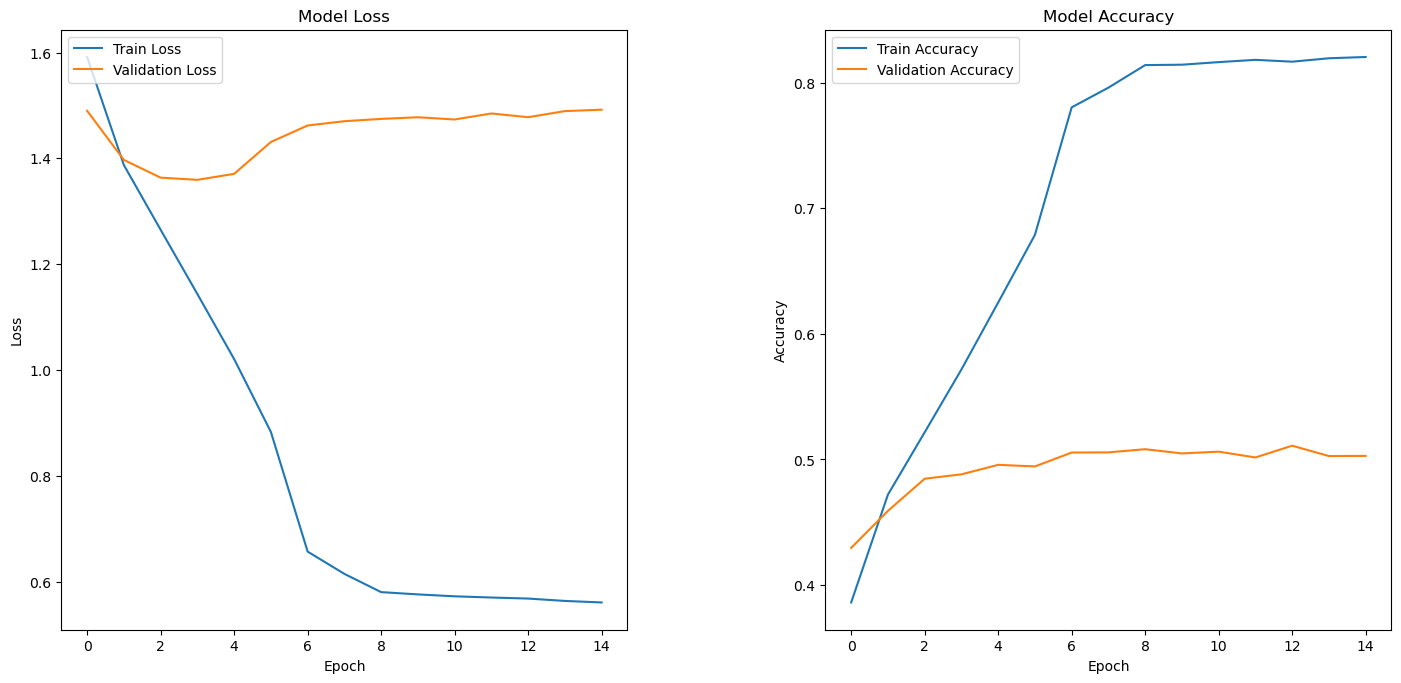

In [653]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot loss on the first subplot
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper left')

# Plot accuracy on the second subplot
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='upper left')

# Adjust the layout to make sure everything fits well
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0.0, hspace=0.25, wspace=0.35)

# Show the plot
plt.show()


In [655]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(validation_generator)

898/898 ━━━━━━━━━━━━━━━━━━━━ 38s 42ms/step - accuracy: 0.8198 - loss: 0.5598
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5007 - loss: 1.4853


In [657]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict the labels
y_pred = model.predict(train_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}

print(f"Number of samples in validation set: {len(train_generator.classes)}")
print(f"Number of predictions: {len(y_pred)}")

# Compute confusion matrix
cm = confusion_matrix(train_generator.classes, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
target_names = list(class_labels.values())
print('Classification Report')
print(classification_report(train_generator.classes, y_pred, target_names=target_names, zero_division=1))  # Use zero_division=1


898/898 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step
Number of samples in validation set: 28709
Number of predictions: 28709
Confusion Matrix:
[[ 528   43  503 1058  682  734  447]
 [  58    6   62  100   75   90   45]
 [ 456   50  528 1146  724  753  440]
 [ 937   89  955 1903 1244 1362  725]
 [ 658   63  682 1249  874  915  524]
 [ 619   61  605 1249  853  880  563]
 [ 415   28  437  822  572  545  352]]
Classification Report
              precision    recall  f1-score   support

       angry       0.14      0.13      0.14      3995
     disgust       0.02      0.01      0.02       436
        fear       0.14      0.13      0.13      4097
       happy       0.25      0.26      0.26      7215
     neutral       0.17      0.18      0.17      4965
         sad       0.17      0.18      0.17      4830
    surprise       0.11      0.11      0.11      3171

    accuracy                           0.18     28709
   macro avg       0.14      0.14      0.14     28709
weighted avg       0.17      0.18   

In [672]:
for layer in model.layers:
    print(layer.name)

input_layer_24
conv2d_56
max_pooling2d_56
flatten_24
dense_55
dense_56


**Visualize activation maps to understand which image regions activate CNN filters for emotion detection.**

Processing image from class: angry - ./test\angry\PrivateTest_35600895.jpg
Processing image from class: disgust - ./test\disgust\PrivateTest_79683471.jpg
Processing image from class: fear - ./test\fear\PrivateTest_55599585.jpg
Processing image from class: happy - ./test\happy\PrivateTest_40679257.jpg
Processing image from class: neutral - ./test\neutral\PrivateTest_84337405.jpg
Processing image from class: sad - ./test\sad\PublicTest_5855566.jpg
Processing image from class: surprise - ./test\surprise\PublicTest_71265996.jpg


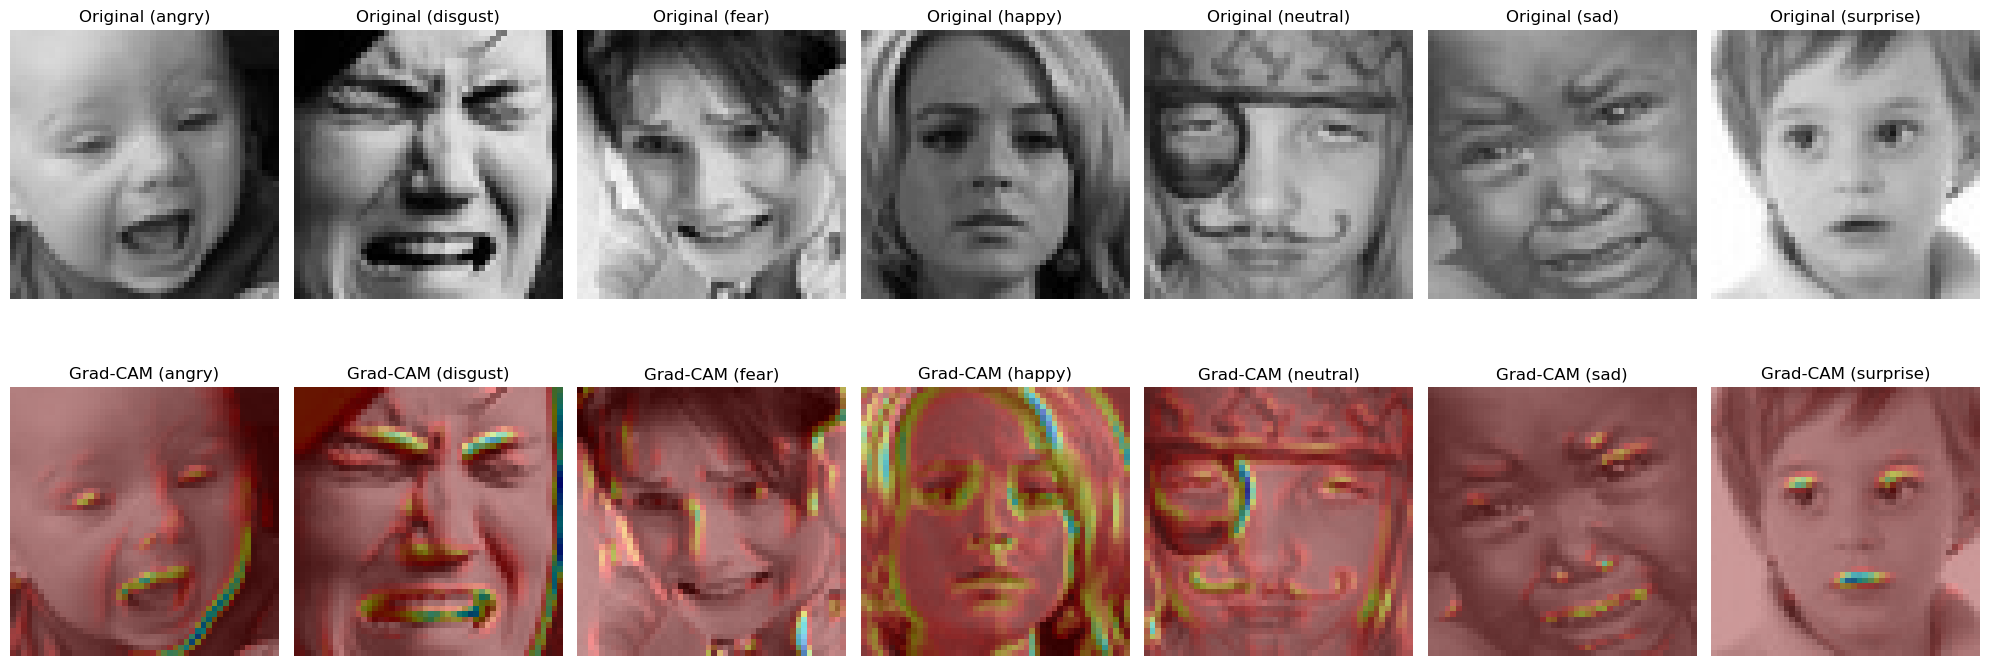

In [690]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import random

def load_and_preprocess_image(img_path, target_size):
    # Load image
    img = cv2.imread(img_path)
    
    # Resize the image to the target size (48x48)
    img_resized = cv2.resize(img, target_size)
    
    # Convert to grayscale (since the model expects a single channel)
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    
    # Normalize the image (if necessary)
    img_gray = img_gray / 255.0  # Assuming the model expects [0, 1] range

    # Add batch dimension (model expects 4D input)
    img_array = np.expand_dims(img_gray, axis=-1)  # Add channel dimension for grayscale
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Convert the image array to a Tensor
    img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

    return img_array, img

def generate_gradcam(model, img_array, last_conv_layer_name, pred_index=None):
    # Ensure the image is a tf.Tensor
    img_array = tf.convert_to_tensor(img_array, dtype=tf.float32)

    # Get the last convolutional layer
    last_conv_layer = model.get_layer(last_conv_layer_name)

    # Create a model that maps the input image to the activations of the last conv layer and the model's predictions
    grad_model = tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

    # Record operations on the image
    with tf.GradientTape() as tape:
        # Watch the image tensor
        tape.watch(img_array)
        
        # Get the model's predictions and the activations of the last conv layer
        conv_outputs, predictions = grad_model(img_array)
        
        # If predictions is a list, take the first element (the actual predictions tensor)
        predictions = predictions[0] if isinstance(predictions, list) else predictions

        # If pred_index is not provided, use the predicted class index
        if pred_index is None:
            pred_index = np.argmax(predictions[0])

        # Get the gradient of the predicted class with respect to the last convolutional layer
        class_channel = predictions[0, pred_index]
        grads = tape.gradient(class_channel, conv_outputs)

    # Compute the guided gradients (averaged over all the filters)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Get the activations of the last convolutional layer
    conv_outputs = conv_outputs[0]

    # Convert to NumPy array for manipulation
    conv_outputs_np = conv_outputs.numpy()

    # Multiply the pooled gradients with the activations of the last conv layer
    for i in range(conv_outputs_np.shape[-1]):
        conv_outputs_np[:, :, i] *= pooled_grads[i]

    # Create a heatmap by averaging across all the channels
    heatmap = np.mean(conv_outputs_np, axis=-1)

    # Normalize the heatmap between 0 and 1, avoid division by zero
    if np.max(heatmap) != 0:
        heatmap = np.maximum(heatmap, 0)
        heatmap /= np.max(heatmap)
    else:
        heatmap = np.zeros_like(heatmap)  # If max is zero, just set the heatmap to zero

    return heatmap

def overlay_heatmap(heatmap, img, alpha=0.4):
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    
    # Ensure heatmap values are valid
    heatmap = np.clip(heatmap, 0, 255)  # Clip to valid range
    
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    overlayed_img = cv2.addWeighted(heatmap, alpha, img, 1 - alpha, 0)
    return overlayed_img

# Set paths and parameters
test_folder = './test'  # Path to the test folder
random_images = get_random_images_from_folder(test_folder, num_images=5)

# Create a subplot grid with 2 rows (original and Grad-CAM images)
num_images = len(random_images)  # Number of images selected
fig, axes = plt.subplots(2, num_images, figsize=(20, 8))

# Iterate through the randomly selected images
for idx, (img_path, class_label) in enumerate(random_images):
    print(f"Processing image from class: {class_label} - {img_path}")
    
    # Load and preprocess the image
    target_size = (48, 48)  # Change based on the input size your model expects (48x48 for this model)
    img_array, img = load_and_preprocess_image(img_path, target_size)

    # Use the correct layer name based on your model summary
    last_conv_layer_name = 'conv2d_56'  # Replace with your actual last convolutional layer name

    # Generate Grad-CAM heatmap
    heatmap = generate_gradcam(model, img_array, last_conv_layer_name)

    # Overlay the heatmap on the image
    overlayed_img = overlay_heatmap(heatmap, cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    # Display the original image in the first row
    axes[0, idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0, idx].set_title(f"Original ({class_label})")
    axes[0, idx].axis('off')  # Hide axes

    # Display the Grad-CAM overlay in the second row
    axes[1, idx].imshow(overlayed_img)
    axes[1, idx].set_title(f"Grad-CAM ({class_label})")
    axes[1, idx].axis('off')  # Hide axes

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [694]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)